In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
df=pd.read_csv('UpdatedStudentsPerformance.csv')

In [2]:
df

gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none        72.0           72.0           74.0  
1                 completed        69.0           90.0           88.0  
2                      none        90.0           95.0           93.0  
3                      none        47.0           57.0           44.0  
4                      none        76.0           78.0           75.0  
..                      ...         ...            ...            ...  
995               completed        88.0           99.0           95.0  
996                    none        62.0           55.0           55.0  
997               completed        59.0           71.0           65.0  
998               completed        68.0           78.0           77.0  
999                    none        77.0           86.0           86.0  

[1000 rows x 8 columns]

In [3]:
df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                     float64
reading score                  float64
writing score                  float64
dtype: object

In [4]:
numeric = df.select_dtypes(include=np.number)

In [5]:
numeric.isna().sum()

math score       10
reading score    15
writing score    11
dtype: int64

In [7]:
for i in numeric:
    numeric[i]=numeric[i].replace(np.NaN,numeric[i].mean())

In [8]:
numeric.isna().sum()

math score       0
reading score    0
writing score    0
dtype: int64

array([[<Axes: title={'center': 'math score'}>,
        <Axes: title={'center': 'reading score'}>],
       [<Axes: title={'center': 'writing score'}>, <Axes: >]],
      dtype=object)

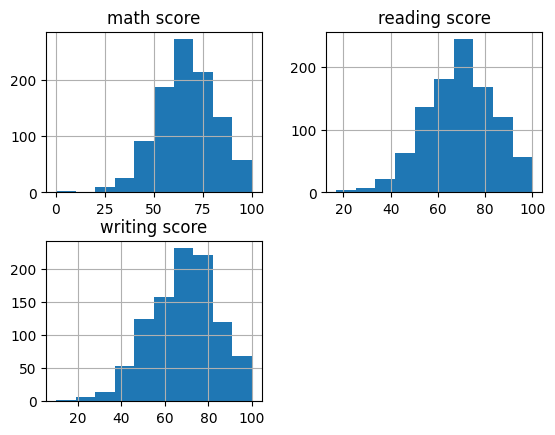

In [9]:
numeric.hist()

<Axes: ylabel='math score'>

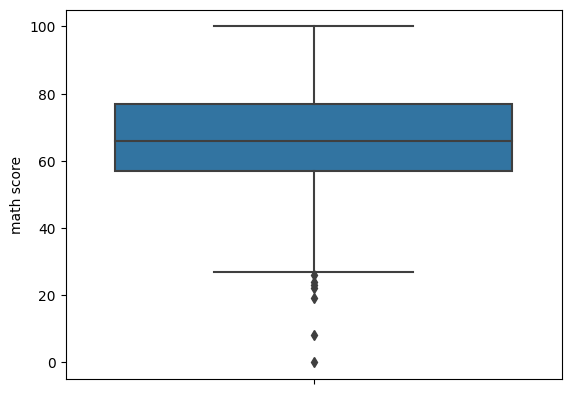

In [10]:
sns.boxplot(y="math score",data=df)

In [12]:
outliers=[]
def detect(df):
    threshold=2
    mean=np.mean(df['math score'])
    std=np.std(df['math score'])
    
    for i in df['math score']:
        zs=(i-mean)/std
        if(np.abs(zs)>threshold):
            outliers.append(i)
    return outliers        

In [13]:
res=detect(df)

In [14]:
print(res,df.shape)

[97.0, 33.0, 0.0, 30.0, 27.0, 98.0, 99.0, 22.0, 100.0, 97.0, 35.0, 34.0, 99.0, 97.0, 99.0, 28.0, 24.0, 35.0, 27.0, 100.0, 100.0, 26.0, 36.0, 29.0, 97.0, 32.0, 30.0, 29.0, 35.0, 100.0, 100.0, 29.0, 98.0, 35.0, 32.0, 19.0, 23.0, 97.0, 97.0, 32.0, 36.0, 34.0, 100.0, 35.0, 98.0, 100.0, 8.0] (1000, 8)


In [16]:
indexval = df[(df['math score'].isin(res))].index
df.drop(indexval,inplace=True) 
df.shape               

(953, 8)

<Axes: ylabel='math score'>

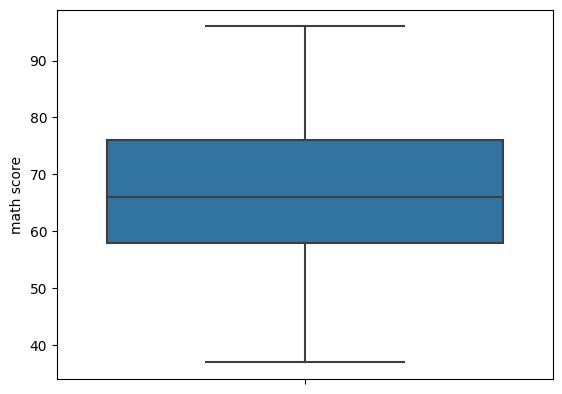

In [17]:
sns.boxplot(y="math score",data=df)

<Axes: >

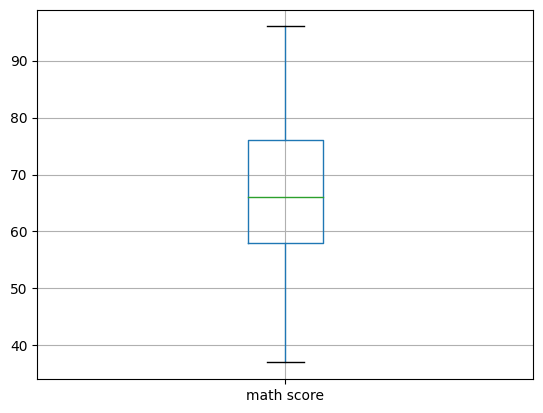

In [19]:
df.boxplot(column='math score')

<Axes: >

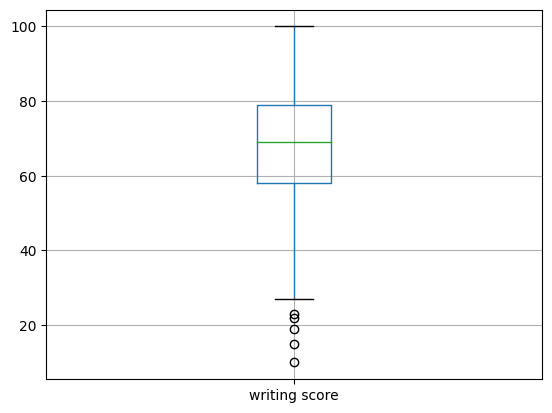

In [22]:
#IQR
numeric.boxplot(column='writing score')

<Axes: >

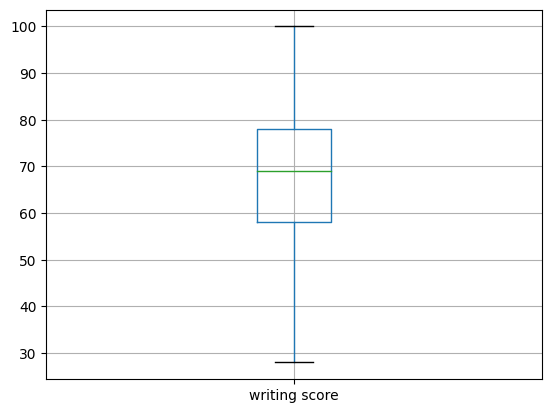

In [24]:
q1 = df['writing score'].quantile(0.25)
q2 = df['writing score'].quantile(0.75)
IQR=q2-q1

low=q1-1.5*IQR
high=q2+1.5*IQR
df=df[(df['writing score']>=low)&(df['writing score']<=high)]
df.boxplot(column='writing score')

<Axes: >

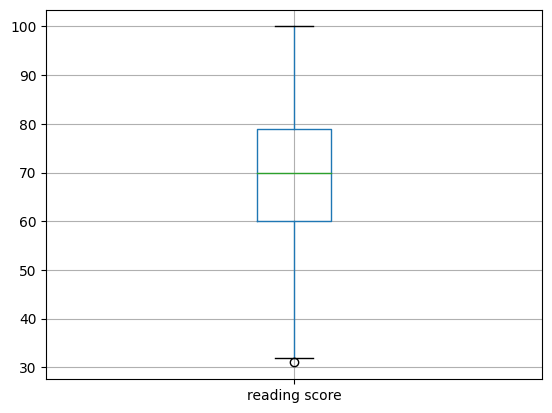

In [25]:
#min max
df.boxplot(column='reading score')

In [26]:
outlier=[]
def detect(df):
    threshold=0
    mini=np.min(df['reading score'])
    maxi=np.max(df['reading score'])
    IQR=maxi-mini
    
    low=mini+threshold*IQR
    high=maxi-threshold*IQR
    
    for i in df['reading score']:
        if i<=low or i>high:
            outliers.append(i)
    return outliers        
            

In [27]:
res2=detect(df)

In [30]:
print(res2,df.shape)

[97.0, 33.0, 0.0, 30.0, 27.0, 98.0, 99.0, 22.0, 100.0, 97.0, 35.0, 34.0, 99.0, 97.0, 99.0, 28.0, 24.0, 35.0, 27.0, 100.0, 100.0, 26.0, 36.0, 29.0, 97.0, 32.0, 30.0, 29.0, 35.0, 100.0, 100.0, 29.0, 98.0, 35.0, 32.0, 19.0, 23.0, 97.0, 97.0, 32.0, 36.0, 34.0, 100.0, 35.0, 98.0, 100.0, 8.0, 31.0] (942, 8)


In [35]:
indexval2 = df[(df['reading score'].isin(res2))].index
df.drop(indexval2,inplace=True)
df.shape

C:\Users\SAURABH\AppData\Local\Temp\ipykernel_1684\326676962.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(indexval2,inplace=True)


(923, 8)

<Axes: >

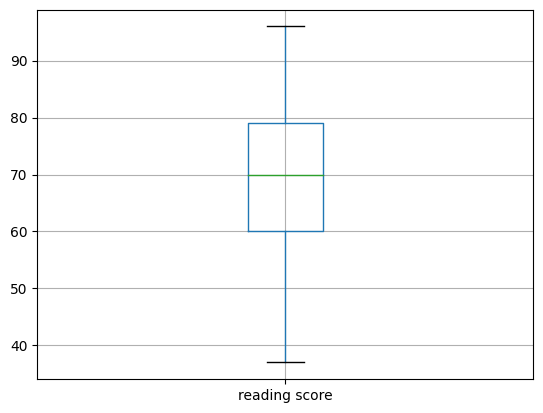

In [36]:
df.boxplot(column='reading score')